In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.constants import golden 

plt.style.use('fivethirtyeight')
plt.rc('figure', figsize = (5.0, 5.0/golden)) 

cs = pd.read_csv('carsharing.csv', delimiter = ';', decimal=",")

cs 

,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
0,102,FRAME D,1,1,3.0,7.9
1,103,FRAME D,1,1,5.3,13.9
2,105,FRAME D,1,-1,0.4,4.1
3,110,FRAME D,1,1,2.8,5.0
4,110,FRAME B,1,-1,2.7,5.6
...,...,...,...,...,...,...
387,996,FRAME C,0,-1,12.5,13.1
388,996,FRAME A,0,1,14.5,17.0
389,996,FRAME C,0,-1,9.8,17.8
390,997,FRAME B,1,-1,1.8,4.0


In [2]:
#3.1 Quanti casi contiene il file
len(cs)

392

In [ ]:
#3.2.1 Il carattere TimeFrame è nominale, ordinale o scalare ?
print('Il carattere Timeframe è ordinale')

In [6]:
#3.2.2 In quante fasce orarie è stata suddivisa una giornata ?
len(cs['TimeFrame'].unique())

5

In [18]:
#3.2.3 In quali fasce orarie il servizio di carsharing è stato maggiormente usato ? 
cs['TimeFrame'].value_counts().sort_values().tail(2)

FRAME C    107
FRAME B    123
Name: TimeFrame, dtype: int64

In [19]:
#3.2.4 Calcolate la tabella delle frequenze congiunte di TimeFrame e RushHour
tf_rh_cong = pd.crosstab(index=cs['TimeFrame'], columns = cs['RushHour'])
tf_rh_cong

RushHour,0,1
TimeFrame,,
FRAME A,47,0
FRAME B,0,123
FRAME C,107,0
FRAME D,0,94
FRAME E,21,0


In [20]:
#3.2.5 Leggendo tale tabella, determinate quali sono le fasce orarie corrispondenti agli orari di punta
print('Leggendo la tabella, le fasce orarie corrispondenti agli orari di punta sono LA B e la D')

Leggendo la tabella, le fasce orarie corrispondenti agli orari di punta sono LA B e la D


In [21]:
#3.3 Consideriamo ora solo i clienti che hanno aderito al programma premium
cs_premium = cs[cs['PremiumCustomer'] == 1]
cs_premium


,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
0,102,FRAME D,1,1,3.0,7.9
1,103,FRAME D,1,1,5.3,13.9
3,110,FRAME D,1,1,2.8,5.0
6,111,FRAME B,1,1,9.3,30.6
10,121,FRAME B,1,1,0.8,4.4
...,...,...,...,...,...,...
382,987,FRAME A,0,1,18.7,25.2
383,989,FRAME A,0,1,7.7,13.1
386,995,FRAME B,1,1,2.1,4.4
388,996,FRAME A,0,1,14.5,17.0


In [22]:
#3.3.1 Quanti sono ?
len(cs_premium)

227

In [27]:
#3.3.2 Fornire una stima della distanza media percorsa in un tragitto da un cliente che ha aderito al programma Premium 
cs_premium['Distance'].mean()

8.437444933920705

In [30]:
#3.3.3 Stimare la probabilità p che un nuovo cliente si iscriva al programma premium 
p = cs.PremiumCustomer.mean()
p

0.15816326530612246

In [31]:
#3.3.4 Quale stimatore avete usato al punto precedente ?
print('La media campionaria')

La media campionaria


In [32]:
#3.3.5 Fornire un'approssimazione della probabilità di compiere nella stima di p un errore al più uguale a 0.05 

In [33]:
#3.4 Ritorniamo a considerare il dataset completo e studiamo la distanza percorsa in ciascun utilizzo del servizio

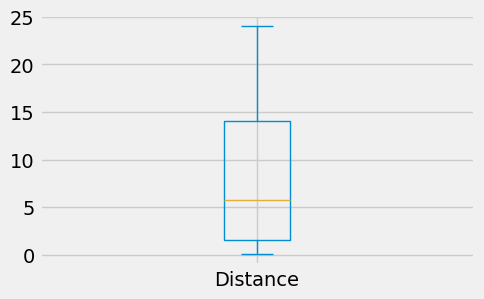

In [35]:
#3.4.1 Tracciate il boxplot di tale carattere
cs['Distance'].plot.box()
plt.show()

In [40]:
#3.4.2 Determinate quali sono gli indici di centralità e dispersione che meglio caratterizzano la distanza percorsa
print('La mediana e il range interquantile')
print(cs['Distance'].quantile(0.5), cs['Distance'].quantile(0.75)-cs['Distance'].quantile(0.25))

La mediana e il range interquantile
5.75 12.45


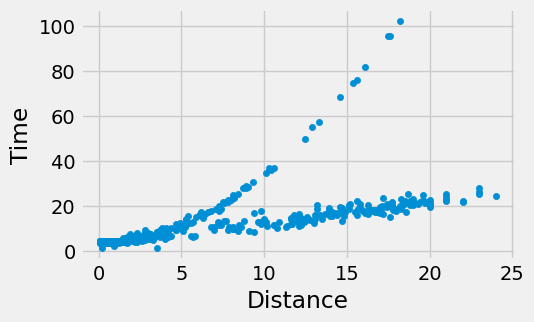

Le due curve hanno andamenti differenti, per cui non vi è correlazione tra di esse.


In [42]:
#3.4.4 Calcolate l'indice di correlazione tra distanza e tempo. Tale valore supporta la risposta al punto precedente ? 
cs.plot.scatter('Distance', "Time")
plt.show()
print('Le due curve hanno andamenti differenti, per cui non vi è correlazione tra di esse.')

In [43]:
#3.5 Analizziamo ora la distanza percorsa in ogni uso del servizio negli orari di punta
cs_rushHour = cs[cs['RushHour'] == 1]
cs_rushHour

,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
0,102,FRAME D,1,1,3.0,7.9
1,103,FRAME D,1,1,5.3,13.9
2,105,FRAME D,1,-1,0.4,4.1
3,110,FRAME D,1,1,2.8,5.0
4,110,FRAME B,1,-1,2.7,5.6
...,...,...,...,...,...,...
378,983,FRAME D,1,-1,1.2,3.9
384,991,FRAME D,1,-1,1.0,3.9
385,993,FRAME B,1,-1,2.6,5.6
386,995,FRAME B,1,1,2.1,4.4


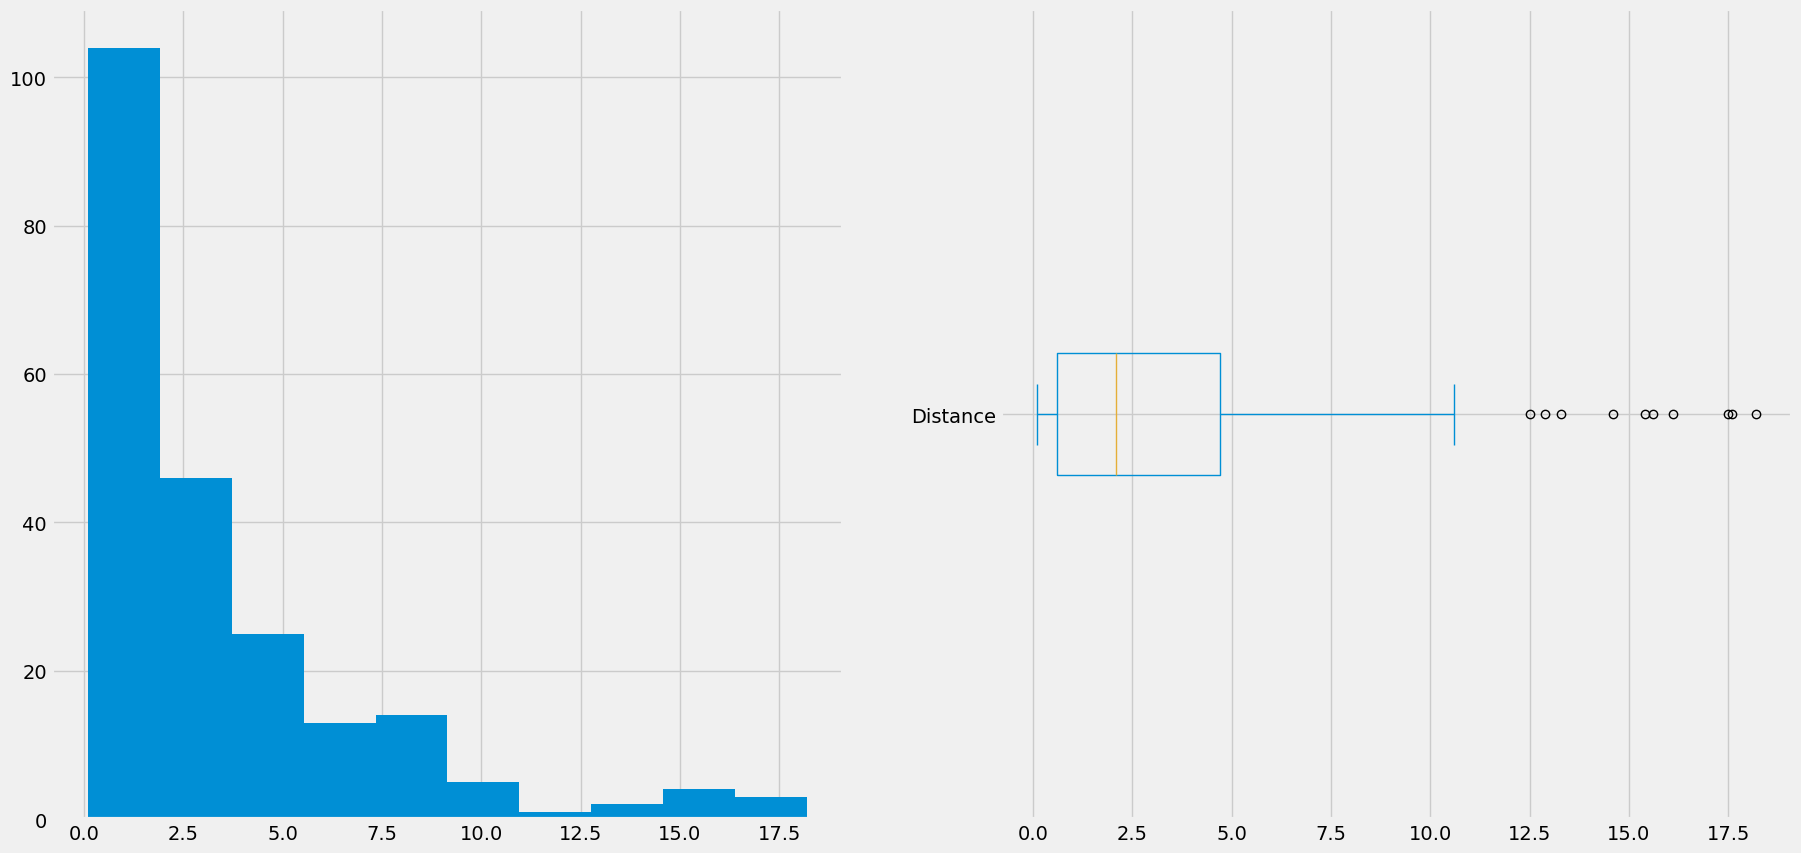

In [57]:
#3.5.1 Tracciare un grafico rappresentativo della distribuzione della distanza percorsa negli orari di punta
plt.figure(figsize = [20,10])
plt.subplot(1,2,1)
cs_rushHour['Distance'].hist()
plt.subplot(1,2,2)
cs_rushHour['Distance'].plot.box(vert = False)
plt.show()


In [61]:
#3.5.2 è plausibile affermare che negli orari di punta la distanza segue una legge normale ? 
print('No perchè istogramma assume un andamento esponenziale.')

No perchè istogramma assume un andamento esponenziale.


In [59]:
#3.5.3 Stimare valore atteso e deviazione standard della distanza negli orari di punta
print('Deviazione standard:', cs_rushHour['Distance'].std(), '\nValore atteso: ', cs_rushHour['Distance'].mean())

Deviazione standard: 3.711106147915895 
Valore atteso:  3.3193548387096796


In [60]:
#3.5.4 Sapreste suggerire un modello probabilistico per la distanza percorsa negli orari di punta ? 
print('Modello esponenziale')

Modello esponenziale


In [62]:
#3.5.5 Le stime di valore atteso e deviazione standard calcolate sono compatibili col modello appena proposto ?
print('Sì perchè sono simili.')

Sì perchè sono simili.
